Number of samples: 232725
Number of features: 18
Number of features: 18642
Number of labels: 18642
Training Features: 14913
Training Labels: 14913
Test Features: 3729
Test Labels: 3729
Training Accuracy: 92.75%
Test Accuracy: 92.14%


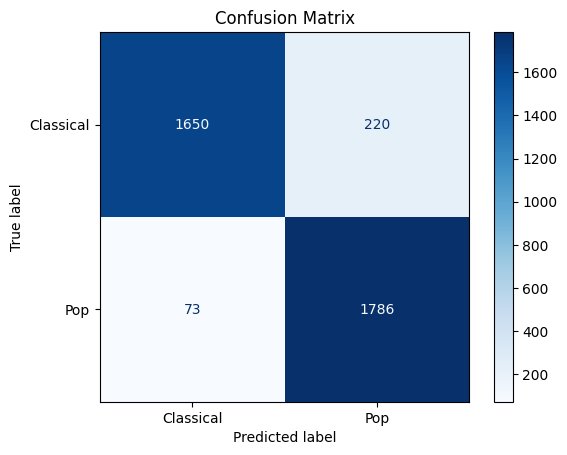

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the data
data = pd.read_csv('../data/SpotifyFeatures.csv')
print(f'Number of samples: {data.shape[0]}')
print(f'Number of features: {data.shape[1]}')

# Filter data for Pop and Classical genres
pop_class_df = data[data['genre'].isin(['Pop', 'Classical'])].copy()

# Assign labels (1 for Pop, 0 for Classical)
pop_class_df['label'] = pop_class_df['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Extract features and labels
X = pop_class_df[['liveness', 'loudness']].values
y = pop_class_df['label'].values

print(f'Number of features: {X.shape[0]}')
print(f'Number of labels: {y.shape[0]}')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f'Training Features: {X_train.shape[0]}')
print(f'Training Labels: {y_train.shape[0]}')
print(f'Test Features: {X_test.shape[0]}')
print(f'Test Labels: {y_test.shape[0]}')

# Normalize the features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model using SGD with L2 regularization
model = LogisticRegression(solver='saga', max_iter=100, penalty='l2', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classical', 'Pop'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
